In [1]:
import numpy as np
import pandas as pd


In [4]:
df = pd.read_csv('iris.data')
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [8]:
# 修改行
df.columns = ['sepal_len', 'sepal_wid', 'pedal_len', 'pedal_wid', 'class']
df.head()

,sepal_len,sepal_wid,pedal_len,pedal_wid,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


#### ix必须同时是下标或者名称

In [10]:
X = df.ix[:,0:4].values
y = df.ix[:,4].values

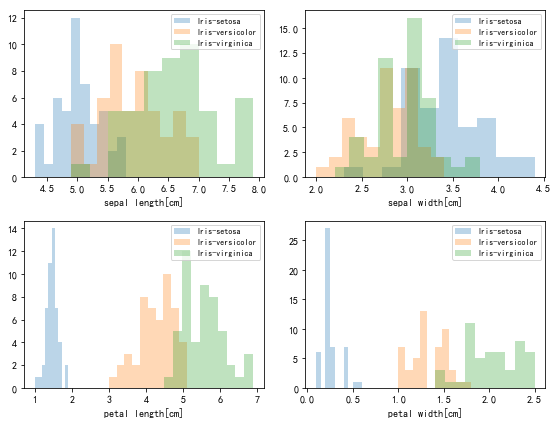

In [15]:
from matplotlib import pyplot as plt
import math

label_dict = {
    1: 'Iris-Setosa',
    2: 'Iris-Vesicolor',
    3: 'Iris-Virgica'
             }

feature_dict = {
    0: 'sepal length[cm]',
    1: 'sepal width[cm]',
    2: 'petal length[cm]',
    3: 'petal width[cm]'
}

plt.figure(figsize=(8, 6))
for cnt in range(4):
    plt.subplot(2, 2, cnt+1)
    for lab in (
        'Iris-setosa',
        'Iris-versicolor',
        'Iris-virginica'
               ):
        plt.hist(
            X[y==lab, cnt],
            label=lab,
            bins=10,
            alpha=0.3,
        )
        plt.xlabel(feature_dict[cnt])
        plt.legend(loc='upper right', fancybox=True, fontsize=8)
plt.tight_layout()
plt.show()

In [17]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
print(X_std)

[[-1.1483555  -0.11805969 -1.35396443 -1.32506301]
 [-1.3905423   0.34485856 -1.41098555 -1.32506301]
 [-1.51163569  0.11339944 -1.29694332 -1.32506301]
 [-1.02726211  1.27069504 -1.35396443 -1.32506301]
 [-0.54288852  1.9650724  -1.18290109 -1.0614657 ]
 [-1.51163569  0.8077768  -1.35396443 -1.19326436]
 [-1.02726211  0.8077768  -1.29694332 -1.32506301]
 [-1.75382249 -0.34951881 -1.35396443 -1.32506301]
 [-1.1483555   0.11339944 -1.29694332 -1.45686167]
 [-0.54288852  1.50215416 -1.29694332 -1.32506301]
 [-1.2694489   0.8077768  -1.23992221 -1.32506301]
 [-1.2694489  -0.11805969 -1.35396443 -1.45686167]
 [-1.87491588 -0.11805969 -1.52502777 -1.45686167]
 [-0.05851493  2.19653152 -1.46800666 -1.32506301]
 [-0.17960833  3.122368   -1.29694332 -1.0614657 ]
 [-0.54288852  1.9650724  -1.41098555 -1.0614657 ]
 [-0.90616871  1.03923592 -1.35396443 -1.19326436]
 [-0.17960833  1.73361328 -1.18290109 -1.19326436]
 [-0.90616871  1.73361328 -1.29694332 -1.19326436]
 [-0.54288852  0.8077768  -1.18

In [20]:
mean_vec = np.mean(X_std, axis=0)
# T 是颠倒过来
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0] - 1)
print('协方差矩阵--Covariance matrix \n%s' % cov_mat)

协方差矩阵--Covariance matrix 
[[ 1.00675676 -0.10448539  0.87716999  0.82249094]
 [-0.10448539  1.00675676 -0.41802325 -0.35310295]
 [ 0.87716999 -0.41802325  1.00675676  0.96881642]
 [ 0.82249094 -0.35310295  0.96881642  1.00675676]]


In [27]:
X_std - mean_vec

array([[-1.1483555 , -0.11805969, -1.35396443, -1.32506301],
       [-1.3905423 ,  0.34485856, -1.41098555, -1.32506301],
       [-1.51163569,  0.11339944, -1.29694332, -1.32506301],
       [-1.02726211,  1.27069504, -1.35396443, -1.32506301],
       [-0.54288852,  1.9650724 , -1.18290109, -1.0614657 ],
       [-1.51163569,  0.8077768 , -1.35396443, -1.19326436],
       [-1.02726211,  0.8077768 , -1.29694332, -1.32506301],
       [-1.75382249, -0.34951881, -1.35396443, -1.32506301],
       [-1.1483555 ,  0.11339944, -1.29694332, -1.45686167],
       [-0.54288852,  1.50215416, -1.29694332, -1.32506301],
       [-1.2694489 ,  0.8077768 , -1.23992221, -1.32506301],
       [-1.2694489 , -0.11805969, -1.35396443, -1.45686167],
       [-1.87491588, -0.11805969, -1.52502777, -1.45686167],
       [-0.05851493,  2.19653152, -1.46800666, -1.32506301],
       [-0.17960833,  3.122368  , -1.29694332, -1.0614657 ],
       [-0.54288852,  1.9650724 , -1.41098555, -1.0614657 ],
       [-0.90616871,  1.

In [22]:
print('Numpy covariance matrix: \n%s' % np.cov(X_std.T))

Numpy covariance matrix: 
[[ 1.00675676 -0.10448539  0.87716999  0.82249094]
 [-0.10448539  1.00675676 -0.41802325 -0.35310295]
 [ 0.87716999 -0.41802325  1.00675676  0.96881642]
 [ 0.82249094 -0.35310295  0.96881642  1.00675676]]


In [28]:
# 倒回来
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('特征向量-Eigenvectors \n%s' % eig_vecs)
print('\n特征值-Eigenvalues\n%s' % eig_vals)

特征向量-Eigenvectors 
[[ 0.52308496 -0.36956962 -0.72154279  0.26301409]
 [-0.25956935 -0.92681168  0.2411952  -0.12437342]
 [ 0.58184289 -0.01912775  0.13962963 -0.80099722]
 [ 0.56609604 -0.06381646  0.63380158  0.52321917]]

特征值-Eigenvalues
[2.92442837 0.93215233 0.14946373 0.02098259]


In [33]:
# abs 返回绝对值
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print(eig_pairs)
print('---------')
eig_pairs.sort(key=lambda x:x[0], reverse=True)
print('按降序排列的特征值-Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

[(2.924428369111116, array([ 0.52308496, -0.25956935,  0.58184289,  0.56609604])), (0.932152330253508, array([-0.36956962, -0.92681168, -0.01912775, -0.06381646])), (0.14946373489813383, array([-0.72154279,  0.2411952 ,  0.13962963,  0.63380158])), (0.020982592764270145, array([ 0.26301409, -0.12437342, -0.80099722,  0.52321917]))]
---------
按降序排列的特征值-Eigenvalues in descending order:
2.924428369111116
0.932152330253508
0.14946373489813383
0.020982592764270145


In [36]:
# 特征值求和
tot = sum(eig_vals)
var_exp = [(i/tot) * 100 for i in sorted(eig_vals, reverse=True)]
print(var_exp)
# cumsum 是累积求和
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

[72.62003332692032, 23.14740685864415, 3.7115155645845306, 0.5210442498510035]


array([ 72.62003333,  95.76744019,  99.47895575, 100.        ])

In [41]:
a = np.array([1, 2, 3, 4])
print(a)
print('----------')
print(np.cumsum(a))

[1 2 3 4]
----------
[ 1  3  6 10]


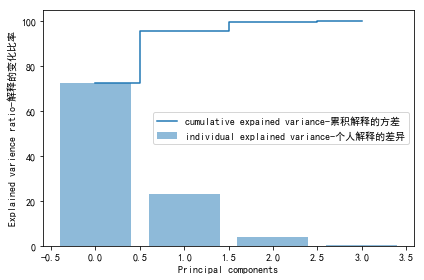

In [45]:
plt.figure(figsize=(6, 4))

plt.bar(
    range(4),
    var_exp,
    alpha=0.5,
    align='center',
    label='individual explained variance-个人解释的差异'
       )

plt.step(
    range(4),
    cum_var_exp,
    where='mid',
    label='cumulative expained variance-累积解释的方差'
)

plt.ylabel('Explained varience ratio-解释的变化比率')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [47]:
matrix_w= np.hstack((
    eig_pairs[0][1].reshape(4, 1),
    eig_pairs[1][1].reshape(4, 1)
))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.52308496 -0.36956962]
 [-0.25956935 -0.92681168]
 [ 0.58184289 -0.01912775]
 [ 0.56609604 -0.06381646]]


## .dot() 返回的连个数组的内积

In [48]:
Y = X_std.dot(matrix_w)
Y

array([[-2.10795032,  0.64427554],
       [-2.38797131,  0.30583307],
       [-2.32487909,  0.56292316],
       [-2.40508635, -0.687591  ],
       [-2.08320351, -1.53025171],
       [-2.4636848 , -0.08795413],
       [-2.25174963, -0.25964365],
       [-2.3645813 ,  1.08255676],
       [-2.20946338,  0.43707676],
       [-2.17862017, -1.08221046],
       [-2.34525657, -0.17122946],
       [-2.24590315,  0.6974389 ],
       [-2.66214582,  0.92447316],
       [-2.2050227 , -1.90150522],
       [-2.25993023, -2.73492274],
       [-2.21591283, -1.52588897],
       [-2.20705382, -0.52623535],
       [-1.9077081 , -1.4415791 ],
       [-2.35411558, -1.17088308],
       [-1.93202643, -0.44083479],
       [-2.21942518, -0.96477499],
       [-2.79116421, -0.50421849],
       [-1.83814105, -0.11729122],
       [-2.24572458, -0.17450151],
       [-1.97825353,  0.59734172],
       [-2.06935091, -0.27755619],
       [-2.18514506, -0.56366755],
       [-2.15824269, -0.34805785],
       [-2.28843932,

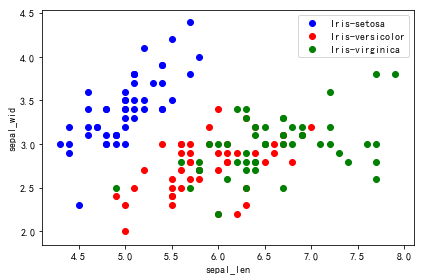

In [50]:
# 投影
plt.figure(figsize=(6, 4))
for lab, col in zip(
    (
        'Iris-setosa',
    'Iris-versicolor',
    'Iris-virginica',
    ),(
        'blue',
        'red',
        'green')):
    plt.scatter(
        X[y==lab, 0],
        X[y==lab, 1],
        label=lab,
        c=col)
plt.xlabel('sepal_len')
plt.ylabel('sepal_wid')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

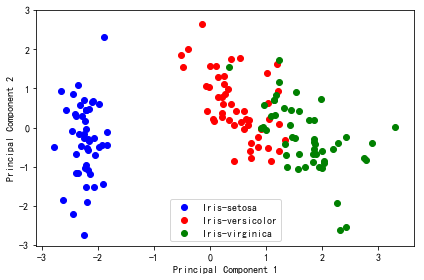

In [51]:
plt.figure(figsize=(6, 4))
for lab, col in zip(
    ('Iris-setosa', 
     'Iris-versicolor', 
     'Iris-virginica'
    ),(
        'blue', 
        'red', 
        'green')):
     plt.scatter(
         Y[y==lab, 0],
         Y[y==lab, 1],
         label=lab,
         c=col)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='lower center')
plt.tight_layout()
plt.show()